# Segmentación de triángulos

### Alumna: Salma Patricia Gutiérrez Rivera

__1.__ Segmentar las aristas de los triángulos. En los resultados, mostrar la imagen binaria de las aristas.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
triangulos = cv2.imread("images/Triangulos.PNG", 0)

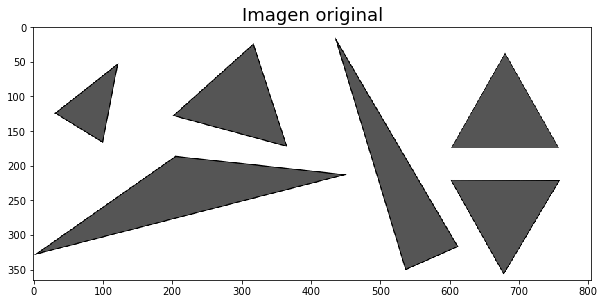

In [32]:
fig = plt.figure(figsize = (10, 5))
fig.add_subplot(1, 1, 1)
plt.imshow(triangulos, cmap = 'gray');
plt.title("Imagen original", size = 18);

No hay ruido en la imagen y hay tres intensidades bien distinguibles: la del fondo, la de los contornos de los triángulos y la de su relleno. Creo que basta una umbralización doble para extraer los contornos.

Primero tengo que hacer el pinche histograma.

In [11]:
triang_hist = cv2.calcHist([triangulos],[0],None,[256],[0,256])
triang_hist = triang_hist / triangulos.size

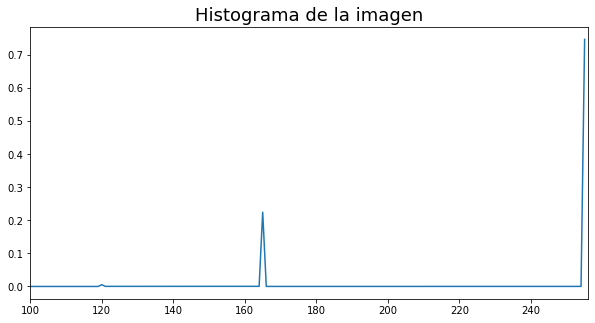

In [13]:
fig = plt.figure(figsize = (10, 5))
fig.add_subplot(1, 1, 1)
plt.xlim([100, 256])
plt.plot(triang_hist);
plt.title('Histograma de la imagen', size = 18);

La intensidad de los contornos es, más o menos, 120.

In [26]:
contornos = np.where(triangulos < 125, 255, 0)

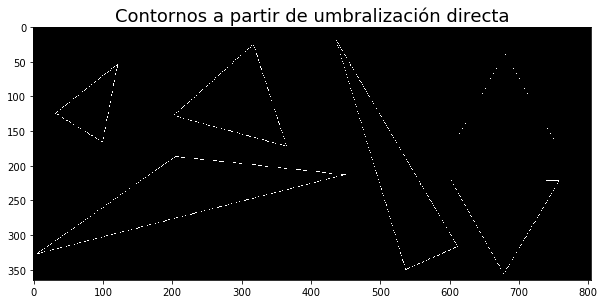

In [33]:
fig = plt.figure(figsize = (10, 5))
fig.add_subplot(1, 1, 1)
plt.imshow(contornos, cmap = 'gray');
plt.title("Contornos a partir de umbralización directa", size = 18);

Nel. No era tan conveniente. Mejor lo hago con erosión.

In [28]:
bin_triang = np.where(triangulos < 170, 255, 0)

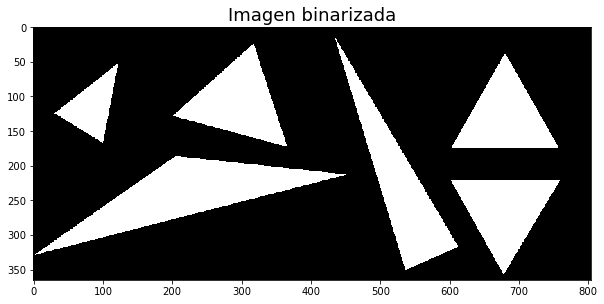

In [34]:
fig = plt.figure(figsize = (10, 5))
fig.add_subplot(1, 1, 1)
plt.imshow(bin_triang, cmap = 'gray');
plt.title("Imagen binarizada", size = 18);

Primero tengo que añadir el padding.

In [30]:
padd_bin_triang = cv2.copyMakeBorder(bin_triang, 5, 5, 5, 5, cv2.BORDER_CONSTANT)

In [37]:
imgu8 = np.uint8(padd_bin_triang)
kernel3 = np.ones((3, 3), np.uint8)
erode3_triang = cv2.erode(imgu8, kernel3, iterations = 1)

In [39]:
contor3 = imgu8 - erode3_triang

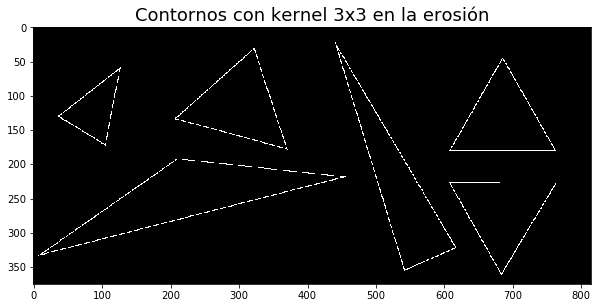

In [45]:
fig = plt.figure(figsize = (10, 5))
fig.add_subplot(1, 1, 1)
plt.imshow(contor3, cmap = 'gray');
plt.title("Contornos con kernel 3x3 en la erosión", size = 18);

No es tan bueno. Usaré un kernel 5x5.

In [41]:
kernel5 = np.ones((5, 5), np.uint8)
erode5_triang = cv2.erode(imgu8, kernel5, iterations = 1)

In [43]:
contor5 = imgu8 - erode5_triang

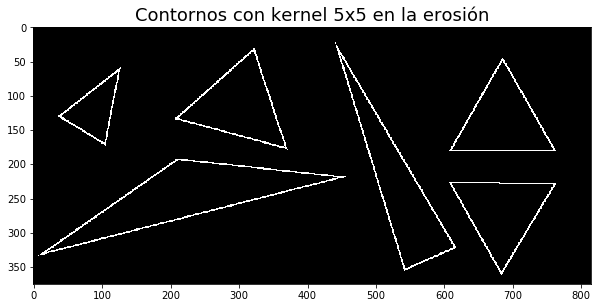

In [46]:
fig = plt.figure(figsize = (10, 5))
fig.add_subplot(1, 1, 1)
plt.imshow(contor5, cmap = 'gray');
plt.title("Contornos con kernel 5x5 en la erosión", size = 18);

Ahora sí :)